In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1, 2, 3 download juptyr import pandas and load csv

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

## 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


## 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita', 'vf']

In [6]:
gdp_df = gdp_df.drop(columns=['vf'])

In [7]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002


## 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
gdp_df_7=gdp_df.groupby('Country')['Year']

In [9]:
gdp_df_7 = gdp_df_7.nunique()

In [10]:
gdp_df_7_all_years = gdp_df_7.reset_index()

In [11]:
gdp_df_7_all_countries = gdp_df_7_all_years[gdp_df_7_all_years['Year']==33]

In [12]:
gdp_df_7_less_countries =  gdp_df_7_all_years[gdp_df_7_all_years['Year']<33]

In [13]:
gdp_df_7_all_countries

,Country,Year
1,Africa Eastern and Southern,33
2,Africa Western and Central,33
3,Albania,33
4,Algeria,33
5,Angola,33
...,...,...
236,Vanuatu,33
237,Viet Nam,33
239,World,33
240,Zambia,33


In [14]:
gdp_df_7_all_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  202 non-null    object
 1   Year     202 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [15]:
gdp_df_7_less_countries.head()

,Country,Year
0,Afghanistan,20
10,Aruba,32
22,Bhutan,32
24,Bosnia and Herzegovina,29
32,Cambodia,30


## 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

(array([5.124e+03, 1.053e+03, 8.830e+02, 3.490e+02, 1.270e+02, 6.100e+01,
        3.500e+01, 2.500e+01, 2.000e+00, 3.000e+00]),
 array([   436.37641563,  16152.98702866,  31869.59764169,  47586.20825471,
         63302.81886774,  79019.42948077,  94736.04009379, 110452.65070682,
        126169.26131985, 141885.87193287, 157602.4825459 ]),
 <BarContainer object of 10 artists>)

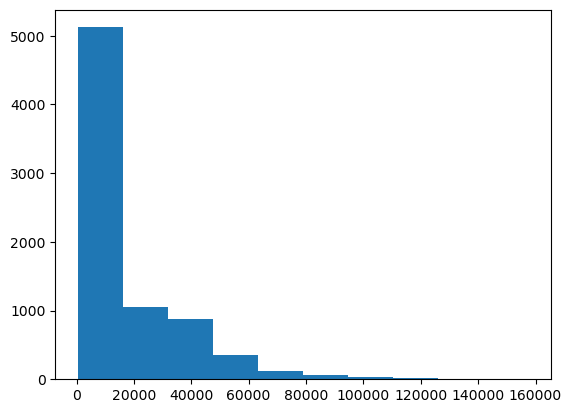

In [16]:
plt.hist(gdp_df.GDP_Per_Capita)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

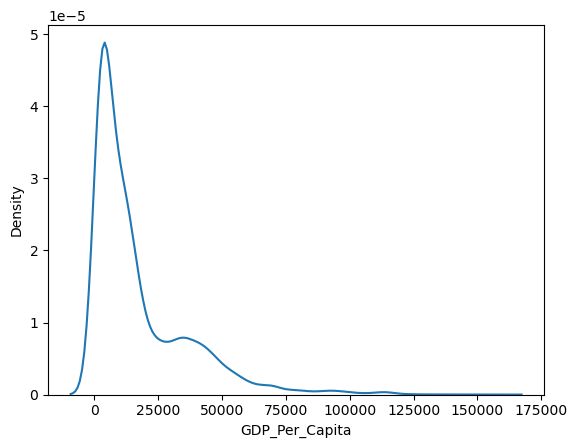

In [17]:
sns.kdeplot(gdp_df.GDP_Per_Capita)

{'whiskers': [<matplotlib.lines.Line2D at 0x162faf19690>,
 'caps': [<matplotlib.lines.Line2D at 0x162ffc21bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162ffc137d0>],
 'medians': [<matplotlib.lines.Line2D at 0x162ffc23190>],
 'fliers': [<matplotlib.lines.Line2D at 0x162ffc23b50>],
 'means': []}

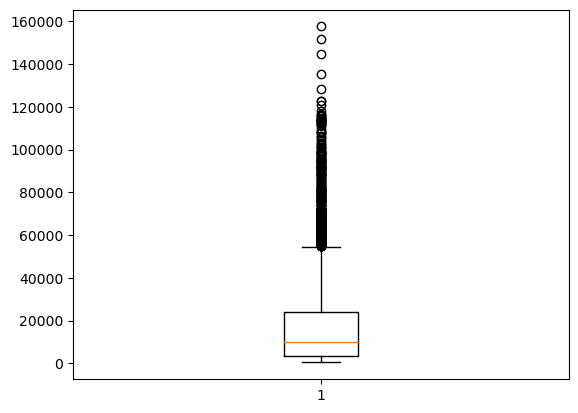

In [18]:
plt.boxplot(gdp_df.GDP_Per_Capita)

{'bodies': [<matplotlib.collections.PolyCollection at 0x162ffc74550>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x162fb0a5a10>,
 'cmins': <matplotlib.collections.LineCollection at 0x162ffc97b10>,
 'cbars': <matplotlib.collections.LineCollection at 0x162ffc950d0>}

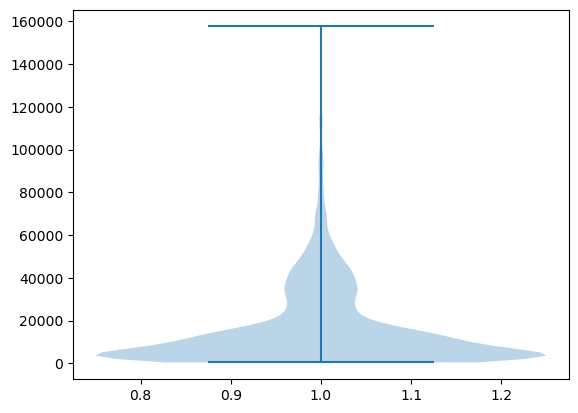

In [19]:
plt.violinplot(gdp_df.GDP_Per_Capita)

## 9. What was the median GDP per capita value in 2020?

In [20]:
gdp_df['GDP_Per_Capita'].median()

10132.449293179425

## 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [21]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [22]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


{'whiskers': [<matplotlib.lines.Line2D at 0x162ffd1b990>,
 'caps': [<matplotlib.lines.Line2D at 0x162ffd29010>,
 'boxes': [<matplotlib.lines.Line2D at 0x162ffd1ad10>],
 'medians': [<matplotlib.lines.Line2D at 0x162ffd2a750>],
 'fliers': [<matplotlib.lines.Line2D at 0x162ffd28c10>],
 'means': []}

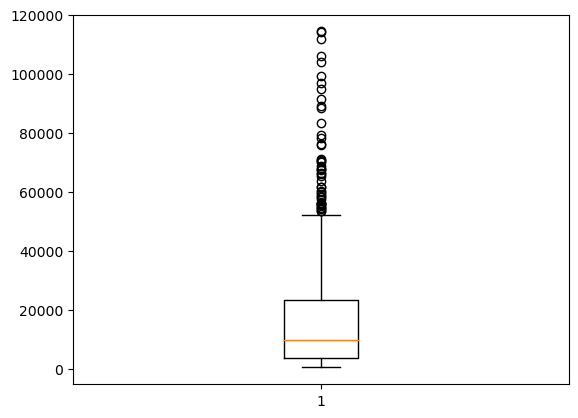

In [23]:
plt.boxplot(gdp_decades.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

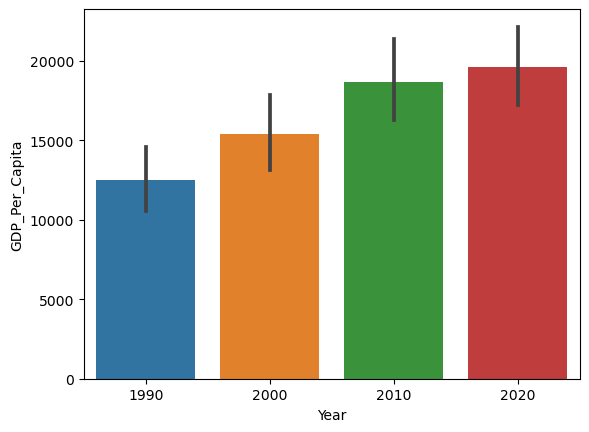

In [24]:
sns.barplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita)

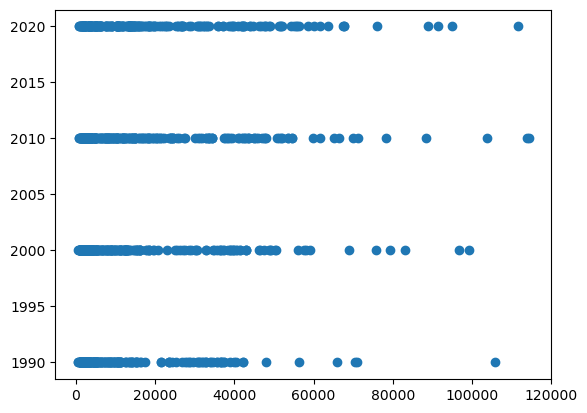

In [25]:
plt.scatter(gdp_decades.GDP_Per_Capita, gdp_decades.Year)

<Axes: >

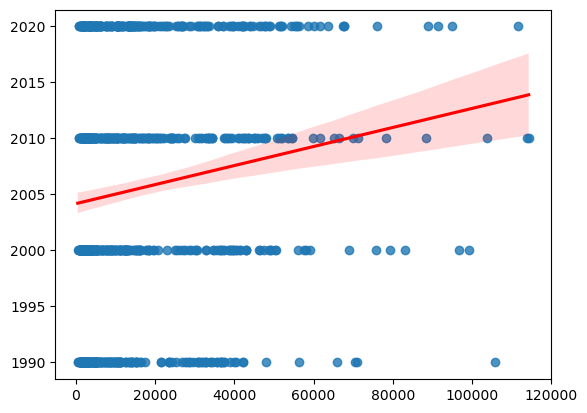

In [26]:
sns.regplot(x=[gdp_decades.GDP_Per_Capita], y=[gdp_decades.Year], line_kws ={"color":"r"})

INSERT COMMENT mo' time, mo' money, mo' problems?

## 11. Which country was the first to have a GDP per capita greater than $100,000?

In [27]:
gdp_dfgreat = gdp_df[gdp_df['GDP_Per_Capita']>=100000].sort_values('Year').head(1)

In [28]:
gdp_dfgreat.head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


## 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [29]:
gdp_df2020R= gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=False)

In [30]:
gdp_df2020R.head(1)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


## 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [31]:
gdp_df2020P= gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=True)

In [32]:
gdp_df2020P.head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [33]:
gdp_df_burundi = gdp_df[gdp_df['Country']=='Burundi']

In [34]:
gdp_df_burundi

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


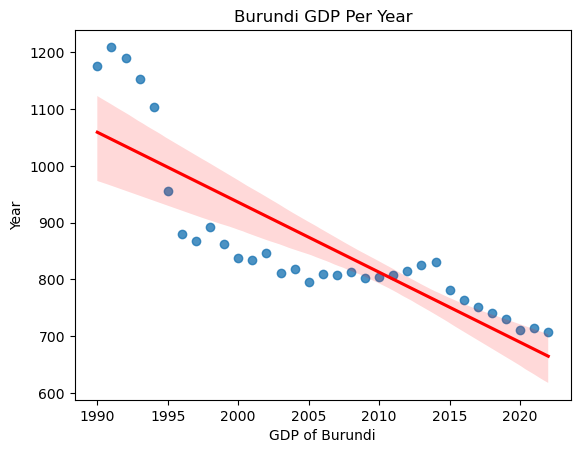

In [35]:
sns.regplot(x=[gdp_df_burundi.Year], y=[gdp_df_burundi.GDP_Per_Capita], line_kws ={"color":"r"})
plt.title("Burundi GDP Per Year")
plt.xlabel("GDP of Burundi")
plt.ylabel("Year")
plt.show()

 ## Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [36]:
gdp_bonus = gdp_df[gdp_df['Year'].isin([1990,2020])]

In [37]:
gdp_bonus.dropna()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
52,Africa Eastern and Southern,1990,3037.297466
55,Africa Western and Central,2020,3957.933804
85,Africa Western and Central,1990,2788.301039
...,...,...,...
7595,World,1990,9705.981267
7598,Zambia,2020,3183.650773
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419


In [38]:
gdp_bonus_2020 = [gdp_bonus['Year']==2020]

In [39]:
gdp_bonus_1990 = [gdp_bonus['Year']==1990]

gdp_bonus_final = gdp_bonus_2020[gdp_bonus_2020['GDP_Per_Capita'] > [gdp_bonus_1990['GDP_Per_Capita']]]

Maybe Reset Index for this one, come back wasting time

PART 2

## 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [40]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')

In [41]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [42]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6380 non-null   object 
 1   Year             6380 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 199.5+ KB


## 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [43]:
internet_df.columns= ['Country', 'Year', 'Internet_Users_Pct', 'vf']

In [44]:
internet_df = internet_df.drop(columns=['vf'])

In [45]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


## 16. Look at the number of observations in this dataset per year. What do you notice?

copypaste = internet_df[internet_df['Columnname']].internet_df[internet_df['othercolumn']('lateruse')]

In [46]:
len(internet_df)

6380

In [47]:
internet_df.shape[0]

6380

In [48]:
internet_df.shape[1]

3

In [49]:
len(internet_df.columns)

3

In [50]:
len(internet_df.index)

6380

In [51]:
internet_df.describe()

,Internet_Users_Pct
count,6083.000000
mean,29.655588
std,31.381472
min,0.000000
25%,1.497090
50%,16.551000
75%,55.659950
max,100.000000


In [52]:
internet_df.value_counts()

Country      Year  Internet_Users_Pct
Afghanistan  1990  0.0000                1
Nicaragua    2009  7.3000                1
             2018  37.6000               1
             2017  30.4000               1
             2016  24.5718               1
                                        ..
France       2013  81.9198               1
             2012  81.4400               1
             2011  77.8200               1
             2010  77.2800               1
Zimbabwe     2022  32.5615               1
Name: count, Length: 6083, dtype: int64

## 17. What is the first year to have a non-zero internet users percentage value?

In [53]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [54]:
internet_df_dropped = internet_df.dropna()

In [55]:
internet_df_17a = internet_df_dropped.sort_values('Year')['Internet_Users_Pct'].reset_index()

In [56]:
internet_df_17a.head()

,index,Internet_Users_Pct
0,6082,0.0
1,4988,0.0
2,598,0.0
3,1747,0.0
4,5019,0.0
